In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
def vector_magnitude(vector):
    return np.linalg.norm(vector)

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude_product = vector_magnitude(vector1) * vector_magnitude(vector2)
    return dot_product / magnitude_product

def t1function(df, initial_comparison_location):
    end_point_1 = df["t1"][initial_comparison_location] 
    start_point_r1 = np.array(df.iloc[initial_comparison_location, 1:4])
    
    correlations_t1 = []
    distance = []
    
    for i in range(len(df)):
        end_point_2 = df["t1"][i]
        start_point_r2 = np.array(df.iloc[i, 1:4])
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t1.append(correlation)
        
        distance.append(abs(initial_comparison_location - i))
    t1_array = [distance, correlations_t1]
    return np.array(t1_array)

def t3function(df, initial_comparison_location):
    end_point_1 = np.array(df.iloc[initial_comparison_location, 4:7])  # Extract columns 4, 5, and 6
    start_point_r1 = np.array(df.iloc[initial_comparison_location, 1:4])  # Extract columns 1, 2, and 3

    correlations_t3 = []
    distance = []

    for i in range(len(df)):
        end_point_2 = np.array(df.iloc[i, 4:7])  # Extract columns 4, 5, and 6 for the second end point
        start_point_r2 = np.array(df.iloc[i, 1:4])  # Extract columns 1, 2, and 3 for the second start point
        
        vector1 = end_point_1 - start_point_r1
        vector2 = end_point_2 - start_point_r2
        
        correlation = cosine_similarity(vector1, vector2)
        correlations_t3.append(correlation)
        
        distance.append(abs(initial_comparison_location - i))
    
    t3_array = [distance, correlations_t3]
    return np.array(t3_array)

In [23]:
simulation_number = 218
t1_final_list = []
t3_final_list = []

for snap in range(177, 178):
    file_path = f"/Users/angelikahirsch/Documents/chromo/output/sim_{simulation_number}/poly_1-{snap}.csv"
    df = pd.read_csv(file_path)

    t2coordinates = df[["('t2', 'x')", "('t2', 'y')", "('t2', 'z')"]].values
    t3coordinates = df[["('t3', 'x')", "('t3', 'y')", "('t3', 'z')"]].values

    t1coordinates = np.cross(t2coordinates, t3coordinates)
    df['t1'] = [t1coordinates[i] for i in range(len(t1coordinates))]

    t1_final_list.extend([t1function(df, initial_comparison) for initial_comparison in range(len(df))])
    t3_final_list.extend([t3function(df, initial_comparison) for initial_comparison in range(len(df))])

t1_final_array = np.array(t1_final_list)
distance_1 = t1_final_array[:, 0].flatten()
correlation_1 = t1_final_array[:, 1].flatten()

t3_final_array = np.array(t3_final_list)
distance_3 = t3_final_array[:, 0].flatten()
correlation_3 = t3_final_array[:, 1].flatten()   



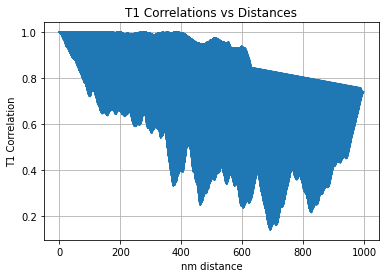

In [29]:
plt.plot(distance_1, correlation_1)  # Adjust marker and size as needed
plt.xlabel('nm distance')
plt.ylabel('T1 Correlation')
plt.title('T1 Correlations vs Distances')
plt.grid(True)
plt.savefig(f"{simulation_number}_T1_tangent_correlations.png")
plt.show()



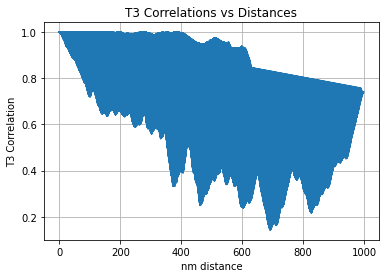

In [26]:
plt.plot(distance_3, correlation_3)  # Adjust marker and size as needed
plt.xlabel('nm distance')
plt.ylabel('T3 Correlation')
plt.title('T3 Correlations vs Distances')
plt.grid(True)
#plt.savefig(f"{simulation_number}_T3_tangent_correlations.png")
plt.show()

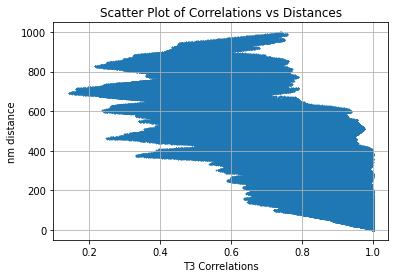

In [28]:
plt.scatter(correlation_3, distance_3, marker='.', s=1)  # Adjust marker and size as needed
plt.xlabel('T3 Correlations')
plt.ylabel('nm distance')
plt.title('Scatter Plot of Correlations vs Distances')
plt.grid(True)
plt.savefig(f"{simulation_number}_T3_tangent_correlations.png")
plt.show()

In [13]:
selected_rows = analysis_df[analysis_df['Distances'] == 997]
print(len(selected_rows))
print(selected_rows)

0
Empty DataFrame
Columns: [Distances, Correlation]
Index: []


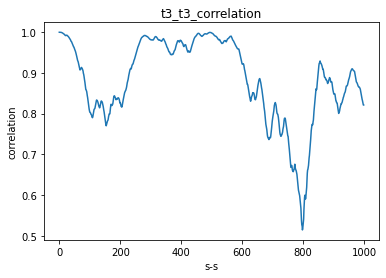

In [19]:
plt.plot(t3function(df))

# Add labels and title
plt.xlabel("s-s")
plt.ylabel('correlation')
plt.title('t3_t3_correlation')

# Display the plot
plt.show()

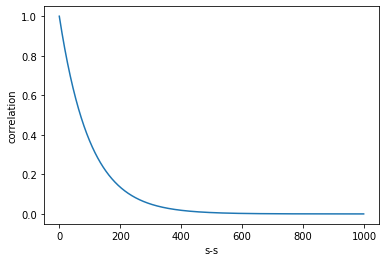

In [20]:
# What the t1 and t3 correlations should theoretically look like
lt = 100
lp = 100
x = df. iloc[:,0]
y = []
for i in range(len(x)):
    new_y = -1 * (x[i]/lt)
    new_y = np.exp(new_y)
    y.append(new_y)
    
plt.plot(y)
plt.xlabel("s-s")
plt.ylabel('correlation')

# Display the plot
plt.show()
            